<a href="https://colab.research.google.com/github/ducanhho2296/AI-Lab-Masked-Face-Recognition-Challenge/blob/main/facial_extract_with_dlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Create Testset

In [ ]:
!mkdir -p /content/Test
!mkdir /content/Test/0_0_000
!mkdir /content/Test/0_0_001

##load faces and labels from datasets

In [ ]:
from imutils import paths
import numpy as np
import cv2
import os

# face_detect = dlib.get_frontal_face_detector()

def load_face_dataset(inputPath, minConfidence=0.5,
	minSamples=1):
	# grab the paths to all images in our input directory, extract
	# the name of the person (i.e., class label) from the directory
	# structure, and count the number of example images we have per
	# face
  imagePaths = list(paths.list_images(inputPath))
  print(imagePaths)
  names = [p.split(os.path.sep)[-2] for p in imagePaths]
  (names, counts) = np.unique(names, return_counts=True)
  names = names.tolist()
  
  # faces = [] 
  labels = []

  for imagepath in imagePaths:
    # image = cv2.imread(imagepath)
    name = imagepath.split(os.path.sep)[-2]
    # print(name)
    if counts[names.index(name)] < minSamples:
      continue
    # faces.append(image)
    labels.append(name)
  
  # faces = np.array(faces)
  labels= np.array(labels)

  return labels

In [ ]:
b = load_face_dataset("/content/Test")

['/content/Test/0_0_000/image_resize.jpg', '/content/Test/0_0_001/12_resize.png', '/content/Test/0_0_001/13_resize.png', '/content/Test/0_0_001/15_resize.PNG', '/content/Test/0_0_001/14_resize.PNG']


##Local Binary Pattern

In [4]:
import cv2 
import numpy as np 

def calculate_LBP(img):
  # img = cv2.imread(img_path)
  def assign_bit(image, x, y, c):  #comparing bit with threshold value of centre pixel
      bit = 0  
      try:          
          if image[x][y] >= c: 
              bit = 1         
      except: 
          pass
      return bit 
  def local_bin_val(image, x, y):  #calculating local binary pattern value of a pixel
      eight_bit_binary = []
      centre = image[x][y] 
      powers = [1, 2, 4, 8, 16, 32, 64, 128] 
      decimal_val = 0 
      #starting from top right,assigning bit to pixels clockwise 
      eight_bit_binary.append(assign_bit(image, x-1, y + 1,centre)) 
      eight_bit_binary.append(assign_bit(image, x, y + 1, centre)) 
      eight_bit_binary.append(assign_bit(image, x + 1, y + 1, centre)) 
      eight_bit_binary.append(assign_bit(image, x + 1, y, centre)) 
      eight_bit_binary.append(assign_bit(image, x + 1, y-1, centre)) 
      eight_bit_binary.append(assign_bit(image, x, y-1, centre)) 
      eight_bit_binary.append(assign_bit(image, x-1, y-1, centre)) 
      eight_bit_binary.append(assign_bit(image, x-1, y, centre))     
      #calculating decimal value of the 8-bit binary number
      for i in range(len(eight_bit_binary)): 
          decimal_val += eight_bit_binary[i] * powers[i] 
            
      return decimal_val 
  m, n, _ = img.shape 
  gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #converting image to grayscale
  lbp_img = np.zeros((m, n),np.uint8) 
  # converting image to lbp
  for i in range(0,m): 
      for j in range(0,n): 
          lbp_img[i, j] = local_bin_val(gray_scale, i, j) 
 
  n_bins1 = int(lbp_img.max() + 1)
  hist, _ = np.histogram(lbp_img, density=True, bins=n_bins1, range=(0, n_bins1))
  return hist, lbp_img

####Plot LBP images

In [3]:
import matplotlib.pyplot as plt
import cv2

def plot_2imgs(img1, img2, name1 = "extracted ROI", name2 = "landmark"):
  fig = plt.figure(figsize=(5, 5))

  rows = 2
  columns = 2
  fig.add_subplot(rows, columns, 1)

  # showing image
  plt.imshow(img1)
  plt.axis('image1:')
  plt.title(name1)
    
  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)
    
  # showing image
  plt.imshow(img2)
  plt.axis('image2:')
  plt.title(name2)

#### Calculate Distance of two histogram with Kullback divergence

In [ ]:
def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))

#Extract ROI using Dlib

In [5]:
import imutils
from imutils import face_utils 
import dlib
import matplotlib.pyplot as plt

In [ ]:
# img_path1 = "Test/0/14_resize.PNG"
img_path1 = "/content/Test/0_0_001/image (2).jpg"

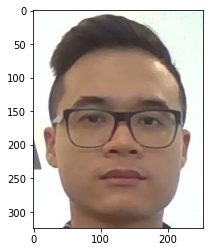

In [ ]:
#img1 = dlib.load_rgb_image(img_path1)
img1 = dlib.load_rgb_image(img_path1)
plt.imshow(img1)

In [6]:
!git clone https://github.com/italojs/facial-landmarks-recognition

Cloning into 'facial-landmarks-recognition'...
remote: Enumerating objects: 8, done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 8
Unpacking objects: 100% (8/8), done.


In [1]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    dist = 1 - (a / (np.sqrt(b) * np.sqrt(c)))
    print("cosine similarity: ", dist)
    #similarity threshold
    if dist >= 0 and dist < 0.35: print("Same person")
    elif dist >= 0.35 and dist < 0.7: print("Must use LBP to verify this pair")
    else: print("not the same person")
    return dist

In [7]:
face_detect = dlib.get_frontal_face_detector()
landmark_detect = dlib.shape_predictor("facial-landmarks-recognition/shape_predictor_68_face_landmarks.dat")
# landmark_detect1 = landmark_detect

from collections import OrderedDict

FACIAL_LANDMARKS_IDXS = OrderedDict([("right_eyebrow", (17, 22)),
                                      ("left_eyebrow", (22, 27)),
                                      ("right_eye", (36, 42)),
                                      ("left_eye", (42, 48))])

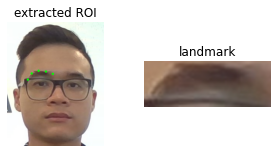

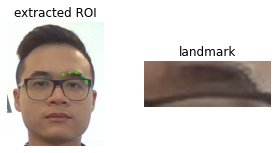

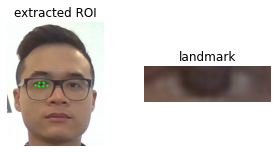

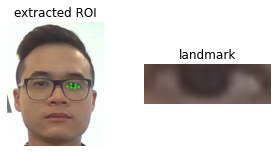

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow

roi_tuple = []
clone_tuple = []
face = face_detect(img1, 1)
# gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
for (i, rect) in enumerate(face):
  shape = landmark_detect(img1, rect)
  shape = face_utils.shape_to_np(shape) #convert landmark (x,y) to array

  for (name, (i,j)) in FACIAL_LANDMARKS_IDXS.items():
    img_clone = img1.copy()
    # cv2.putText(img_clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
    #             0.7, (0, 0, 255), 2)
    
    for (x, y) in shape[i:j]:
      cv2.circle(img_clone, (x, y), 3, (0, 255, 0), -1)
    (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
    roi = img1[y:y + h, x:x + w]
    roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
    roi_tuple.append(roi)
    clone_tuple.append(img_clone)

plot_2imgs(clone_tuple[0], roi_tuple[0])
plot_2imgs(clone_tuple[1], roi_tuple[1])
plot_2imgs(clone_tuple[2], roi_tuple[2])
plot_2imgs(clone_tuple[3], roi_tuple[3])

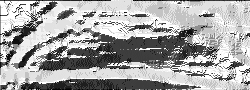

ROI_eyebrow



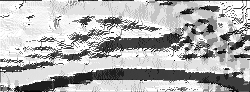

ROI_eyebrow



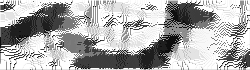

ROI_eye



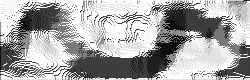

ROI_eye



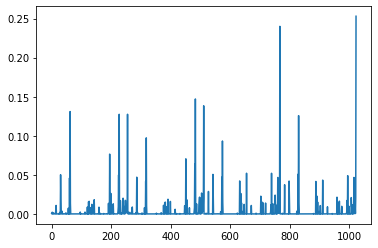

In [ ]:
hist0, img_lbp0 = calculate_LBP(roi_tuple[0])
hist1, img_lbp1 = calculate_LBP(roi_tuple[1])
hist2, img_lbp2 = calculate_LBP(roi_tuple[2])
hist3, img_lbp3 = calculate_LBP(roi_tuple[3])

#convert histogram in list 
hist0 = list(hist0)
hist1 = list(hist1)
hist2 = list(hist2)
hist3 = list(hist3)

#concatenate histograms into a histogram
hist = hist0 + hist1 + hist2 + hist3
plt.plot(hist)

cv2_imshow(img_lbp0)
print("ROI_eyebrow\n")
cv2_imshow(img_lbp1)
print("ROI_eyebrow\n")
cv2_imshow(img_lbp2)
print("ROI_eye\n")
cv2_imshow(img_lbp3)
print("ROI_eye\n")

Another face example

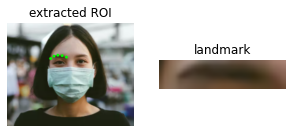

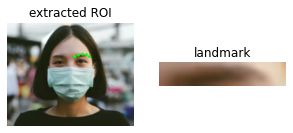

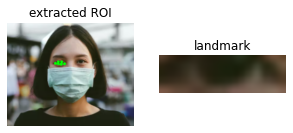

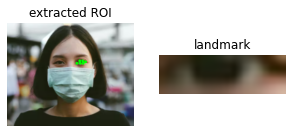

In [12]:
import numpy as np
from google.colab.patches import cv2_imshow

img1 = dlib.load_rgb_image("/content/13.png")
roi_tuple = []
clone_tuple = []
face = face_detect(img1, 1)
# gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
for (i, rect) in enumerate(face):
  shape = landmark_detect(img1, rect)
  shape = face_utils.shape_to_np(shape) #convert landmark (x,y) to array

  for (name, (i,j)) in FACIAL_LANDMARKS_IDXS.items():
    img_clone = img1.copy()
    # cv2.putText(img_clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
    #             0.7, (0, 0, 255), 2)
    
    for (x, y) in shape[i:j]:
      cv2.circle(img_clone, (x, y), 3, (0, 255, 0), -1)
    (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
    roi = img1[y:y + h, x:x + w]
    roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
    roi_tuple.append(roi)
    clone_tuple.append(img_clone)

plot_2imgs(clone_tuple[0], roi_tuple[0])
plot_2imgs(clone_tuple[1], roi_tuple[1])
plot_2imgs(clone_tuple[2], roi_tuple[2])
plot_2imgs(clone_tuple[3], roi_tuple[3])

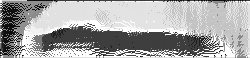

ROI_eyebrow



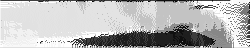

ROI_eyebrow



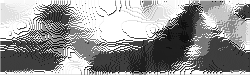

ROI_eye



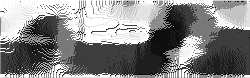

ROI_eye



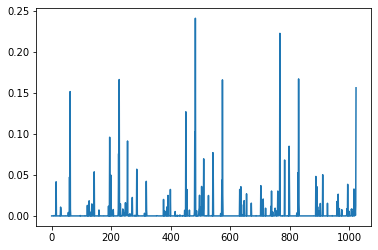

In [13]:
hist0, img_lbp0 = calculate_LBP(roi_tuple[0])
hist1, img_lbp1 = calculate_LBP(roi_tuple[1])
hist2, img_lbp2 = calculate_LBP(roi_tuple[2])
hist3, img_lbp3 = calculate_LBP(roi_tuple[3])

#convert histogram in list 
hist0 = list(hist0)
hist1 = list(hist1)
hist2 = list(hist2)
hist3 = list(hist3)

#concatenate histograms into a histogram
hist = hist0 + hist1 + hist2 + hist3
plt.plot(hist)

cv2_imshow(img_lbp0)
print("ROI_eyebrow\n")
cv2_imshow(img_lbp1)
print("ROI_eyebrow\n")
cv2_imshow(img_lbp2)
print("ROI_eye\n")
cv2_imshow(img_lbp3)
print("ROI_eye\n")

####face1

d:  [(31, 32) (83, 84)]


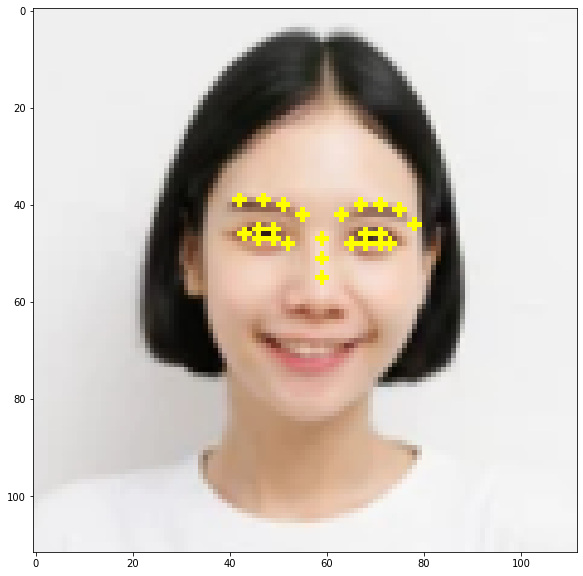

In [ ]:
from itertools import chain
merge_range = chain(range(18,30), range(36, 48)) #take only eyes- and eyebrows area
# x=y=d=0
landmark_tuple = []
for k, d in enumerate(face):
  print("d: ", d)
  landmarks = landmark_detect(img1, d)
  for n in merge_range:
    x1 = landmarks.part(n).x
    y1 = landmarks.part(n).y
    landmark_tuple.append((x1, y1))
    cv2.circle(img1, (x1, y1), 1, (255, 255, 0), -1)
    x1 = y1 = 0
plt.figure(figsize=(10,10))
plt.imshow(img1)

Dlib extract ROI

In [ ]:
from collections import OrderedDict

FACIAL_LANDMARKS_IDXS = OrderedDict([
("mouth", (48, 68)),
("right_eyebrow", (17, 22)),
("left_eyebrow", (22, 27)),
("right_eye", (36, 42)),
("left_eye", (42, 48)),
("nose", (27, 35)),
("jaw", (0, 17))])

def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):
	# create two copies of the input image -- one for the
	# overlay and one for the final output image

  overlay = image.copy()
  output = image.copy()
  # if the colors list is None, initialize it with a unique
  # color for each facial landmark region
  if colors is None:
    colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
      (168, 100, 168), (158, 163, 32),
      (163, 38, 32), (180, 42, 220)]

  for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
  # grab the (x, y)-coordinates associated with the
  # face landmark
    (j, k) = FACIAL_LANDMARKS_IDXS[name]
    pts = shape[j:k]
  # check if are supposed to draw the jawline
    if name == "jaw":
    # since the jawline is a non-enclosed facial region,
    # just draw lines between the (x, y)-coordinates
      for l in range(1, len(pts)):
        ptA = tuple(pts[l - 1])
        ptB = tuple(pts[l])
        cv2.line(overlay, ptA, ptB, colors[i], 2)
  # otherwise, compute the convex hull of the facial
  # landmark coordinates points and display it
    else:
      hull = cv2.convexHull(pts)
      cv2.drawContours(overlay, [hull], -1, colors[i], -1)

    # apply the transparent overlay
  cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
  # return the output image
  return output

####face2

In [ ]:
# x = y = 0
# face_detect2 = dlib.get_frontal_face_detector()
# landmark_detect1 = dlib.shape_predictor("facial-landmarks-recognition/shape_predictor_68_face_landmarks.dat")
# landmark_detect2 = landmark_detect
face2 = face_detect(img2, 1)
face2

rectangles[[(79, 72) (154, 146)]]

d:  [(79, 72) (154, 146)]


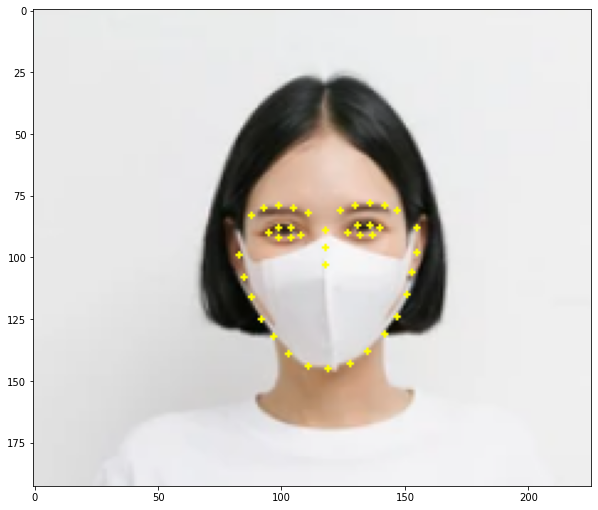

In [ ]:
from itertools import chain
merge_range = chain(range(1,30), range(36, 48)) #take only eyes- and eyebrows area

landmark_tuple2 = []
for k, d in enumerate(face2):
  print("d: ", d)
  landmarks2 = landmark_detect(img2, d)
  for n in merge_range:
    x1 = landmarks2.part(n).x
    y1 = landmarks2.part(n).y
    landmark_tuple2.append((x1, y1))
    cv2.circle(img2, (x1, y1), 1, (255, 255, 0), -1)
    x1 = y1 = 0
plt.figure(figsize=(10,10))
plt.imshow(img2)

####dlib loop

In [ ]:
# import dlib
# import matplotlib.pyplot as plt
import cv2
import numpy as np
# import os

# def load_images_from_folder(folder):
#     images = []
#     for filename in os.listdir(folder):
#         img = cv2.imread(os.path.join(folder,filename))
#         if img is not None:
#             images.append(img)
#     return images

faces = []
# for i in range(2):
#   face = face_detect(images[i], 1)
#   if face != []:
#     faces.append(face)
face_detect = dlib.get_frontal_face_detector()
landmark_detect = dlib.shape_predictor("facial-landmarks-recognition/shape_predictor_68_face_landmarks.dat")

from itertools import chain
merge_range = chain(range(18,30), range(37, 48)) #take only eyes- and eyebrows area
img_new = []
landmark_tuple = []
landmark_compare = []
for i in range(len(images)):
  face = face_detect(images[i], 1)
  # if face != []:
  #   faces.append(face)
  for k, d in enumerate(face):
    print("d: ", d)
    landmarks = landmark_detect(images[i], d)
    for n in merge_range:
      x = landmarks.part(n).x
      y = landmarks.part(n).y
      landmark_tuple.append((x, y))
      landmark_compare.append(landmark_tuple)
      cv2.circle(images[i], (x, y), 2, (255, 255, 0), -1)
      img_new.append(images[i])
      plt.imshow(images[i])
      fig.add_subplot(len(images), i+1, i+1)
  x = y = d = 0
  landmarks = landmark_tuple = []
  print("i",i)
      
  # fig = plt.figure(figsize=(5,5))
  # plt.imshow(img_new[i])
  # fig.add_subplot(len(images), 1, i+1)
  

NameError: ignored

####extract face based on landmarks

In [ ]:
len(landmark_tuple)

24

In [ ]:
routes = []


for i in range(18, 22):
   from_coordinate = landmark_tuple[i]
   to_coordinate = landmark_tuple[i+1]
   routes.append(from_coordinate)

for i in range(23, 27):
   from_coordinate = landmark_tuple[i]
   to_coordinate = landmark_tuple[i+1]
   routes.append(from_coordinate)

# for i in range(37, 42):
#    from_coordinate = landmark_tuple[i]
#    to_coordinate = landmark_tuple[i+1]
#    routes.append(from_coordinate)

# for i in range(43, 48):
#    from_coordinate = landmark_tuple[i]
#    to_coordinate = landmark_tuple[i+1]
#    routes.append(from_coordinate)

# for i in range(28, 30):
#    from_coordinate = landmark_tuple[i]
#    to_coordinate = landmark_tuple[i+1]
#    routes.append(from_coordinate)

# for i in range(37,42):
#    from_coordinate = landmark_tuple[i+1]
#    to_coordinate = landmark_tuple[i]
#    routes.append(from_coordinate)

# from_coordinate = landmark_tuple[0]
# to_coordinate = landmark_tuple[17]
# routes.append(from_coordinate)

IndexError: ignored

In [ ]:
for i in range(0, len(routes)-1):
   from_coordinate = routes[i]
   to_coordinate = routes[i+1]
   img1 = cv2.line(img1, from_coordinate, to_coordinate, (255, 255, 0), 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


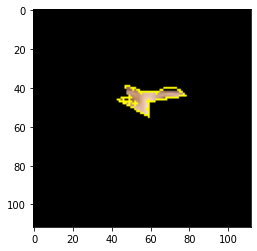

In [ ]:
mask = np.zeros((img1.shape[0], img1.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(np.bool)
 
out = np.zeros_like(img1)
out[mask] = img1[mask]
 
plt.imshow(out)

# extract feature using MediaPine

In [ ]:
!pip install mediapipe==0.8.9.1

In [ ]:
import cv2
import matplotlib.pyplot as plt
 
img = cv2.imread("image.jpg")
 
fig = plt.figure(figsize = (8, 8))
plt.axis('off')
plt.imshow(img[:, :, ::-1])
plt.show()

##Face detector using MediaPipe Pretrain

In [ ]:
import mediapipe

mp_face_mesh = mediapipe.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

###Detect face

In [ ]:
results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
landmarks = results.multi_face_landmarks[0]

###Focusing on a specific face area

In [ ]:
face_oval = mp_face_mesh.FACEMESH_CONTOURS

import pandas as pd
df = pd.DataFrame(list(face_oval), columns = ['p1', 'p2'])
df

###draw line

In [ ]:
routes_idx = []
 
p1 = df.iloc[0]['p1']
p2 = df.iloc[0]['p2']
 
for i in range(0, df.shape[0]):
     
    #print(p1, p2)
     
    obj = df[df['p1'] == p2]
    p1 = obj['p2'].values[0]
    p2 = obj['p2'].values[0]
     
    route_idx = []
    route_idx.append(p1)
    route_idx.append(p2)
    routes_idx.append(route_idx)
 
# -------------------------------
 
for route_idx in routes_idx:
    print("Draw a line between {route_idx[0]}th landmark point to {route_idx[1]}th landmark")


In [ ]:
routes = []
 
for source_idx, target_idx in routes_idx:
     
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
         
    relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
    relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))
 
    #cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
     
    routes.append(relative_source)
    routes.append(relative_target)

In [ ]:
import numpy as np
 
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(bool)
  
out = np.zeros_like(img)
out[mask] = img[mask]
 
fig = plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(out[:, :, ::-1])